# Import Library and Read Data Set

In [ ]:
import os
import numpy as np
import pandas as pd #pandas to convert  data set
import random # random integer
import seaborn as sns #untuk visualisasi matplotlib
import datetime as datetime #ubah format tanggal
from scipy import stats
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
data = pd.read_csv("/content/covid_19_indonesia_time_series_sept2022.csv") # data set with null and missing value
data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


# Informasi Data untuk Data Cleaning

In [ ]:
#cek data yang bersifat null
data.info()
missing_values_count = data.isnull().sum()
missing_values_count[0:38]

# replace NaN with 0 for "Growth Factor of New Cases "
data['Growth Factor of New Cases'] = data['Growth Factor of New Cases'].fillna(float(0))
# replace NaN with 0 for "Growth Factor of New Deaths"
data['Growth Factor of New Deaths'] = data['Growth Factor of New Deaths'].fillna(float(0))
# replace NaN with 0
data['Total Cities'].fillna(float(0), inplace=True)
data['Total Urban Villages'].fillna(float(0), inplace=True)
data['Total Rural Villages'].fillna(float(0), inplace=True)

#inspect columns with same percentage
# Null / missing value pada data lokasi diubah menjadi 'unknown'
data[['Province','Island','Time Zone']].head(10)
data.update(data[['Province','Island','Time Zone']].fillna('Unknown'))

#check null data percentage
data.isnull().mean()*100



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [ ]:
# melihat data jumlah data yang hilang per kolom
# return nya adalah false = null . true = not null
# is null mengembalikan nilai Boolean yang menunjukkan apakah ekspresi tidak berisi data yang valid (null)
missing_values_count = data.isnull().sum() #-> return nya adalah berapa banyak null di kolom tersebut

#sekarang lihat value  yang hilang di seluruh kolom
missing_values_count[0:38]

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                31822
Province                         929
Country                            0
Continent                          0
Island                           929
Time Zone                        929
Special Status                 27264
Total Regencies                    0
Total Cities                     901
Total Districts                    0
Total Urban Villages             904
Total Rural Villages             929
Area (km2)                         0
Population                         0
Population Density                 0
L

In [ ]:
#check null data percentage, return nya yg selain 0 = punya null . tergantung besar atau tidak
data.isnull().mean()*100

Date                             0.000000
Location ISO Code                0.000000
Location                         0.000000
New Cases                        0.000000
New Deaths                       0.000000
New Recovered                    0.000000
New Active Cases                 0.000000
Total Cases                      0.000000
Total Deaths                     0.000000
Total Recovered                  0.000000
Total Active Cases               0.000000
Location Level                   0.000000
City or Regency                100.000000
Province                         2.919364
Country                          0.000000
Continent                        0.000000
Island                           2.919364
Time Zone                        2.919364
Special Status                  85.676576
Total Regencies                  0.000000
Total Cities                     2.831375
Total Districts                  0.000000
Total Urban Villages             2.840802
Total Rural Villages             2

In [ ]:
#delete 'Special Status' column -> delete special status karena isi nya hanya status province
data['Special Status'].value_counts()

Daerah Khusus             2715
Daerah Khusus Ibu Kota     929
Daerah Istimewa            914
Name: Special Status, dtype: int64

In [ ]:
# delete column with missing (NaN) data
# 'City or Regency' 100 persen datanya NaN makanya di delete dan Special Status tidak dibutuhkan
data = data.drop('City or Regency',axis=1)
data = data.drop('Special Status', axis=1)

In [ ]:
# replace NaN with 0 for "Growth Factor of New Cases "
data['Growth Factor of New Cases'] = data['Growth Factor of New Cases'].fillna(float(0))
# replace NaN with 0 for "Growth Factor of New Deaths"
data['Growth Factor of New Deaths'] = data['Growth Factor of New Deaths'].fillna(float(0))
# replace NaN with 0
data['Total Cities'].fillna(float(0), inplace=True)
data['Total Urban Villages'].fillna(float(0), inplace=True)
data['Total Rural Villages'].fillna(float(0), inplace=True)
#inspect 'Total Urban Villages' column
data[['Location','Province','Total Active Cases','Total Cities','Total Urban Villages','Total Rural Villages']].tail()


In [ ]:
#inspect columns with same percentage
# yg missing diubah menjadi unknown
data[['Province','Island','Time Zone']].head(10)
data.update(data[['Province','Island','Time Zone']].fillna('Unknown'))

In [ ]:
# replace NaN with 0
data['Total Cities'].fillna(float(0), inplace=True)
data['Total Urban Villages'].fillna(float(0), inplace=True)
data['Total Rural Villages'].fillna(float(0), inplace=True)
#inspect 'Total Urban Villages' column
data[['Location','Province','Total Active Cases','Total Cities','Total Urban Villages','Total Rural Villages']].tail()

,Location,Province,Total Active Cases,Total Cities,Total Urban Villages,Total Rural Villages
31817,Sulawesi Utara,Sulawesi Utara,560,4.0,332.0,1507.0
31818,Sumatera Barat,Sumatera Barat,203,7.0,230.0,928.0
31819,Sumatera Selatan,Sumatera Selatan,312,4.0,387.0,2853.0
31820,Sumatera Utara,Sumatera Utara,654,8.0,693.0,5417.0
31821,Indonesia,Unknown,28460,98.0,8488.0,74953.0


In [ ]:
#change data type -> Dalam manipulasi data tabular yang terdapat data datetime biasanya tipe datanya berbentuk string
#Data harus dirubah terlebih dahulu menjadi tipe data datetime agar dapat diporses dengan mudah
data['Date'] = pd.to_datetime(data['Date'])
data.tail()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
31817,2022-09-15,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,2022-09-15,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,2022-09-15,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,2022-09-15,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00
31821,2022-09-16,IDN,Indonesia,2358,27,2997,-666,6405044,157876,6218708,...,-0.789275,8.89,24153.07,0.1,595.34,59.53,2.46%,97.09%,0.89,1.29


In [ ]:
#delete duplicate kolom Location krn sama dengan Provincee
#data = data.loc[:, data.columns.drop([('Location')])] #mau nambahin axis sama inplace = true
data.isna().mean()*100

Date                           0.0
Location ISO Code              0.0
Location                       0.0
New Cases                      0.0
New Deaths                     0.0
New Recovered                  0.0
New Active Cases               0.0
Total Cases                    0.0
Total Deaths                   0.0
Total Recovered                0.0
Total Active Cases             0.0
Location Level                 0.0
Province                       0.0
Country                        0.0
Continent                      0.0
Island                         0.0
Time Zone                      0.0
Total Regencies                0.0
Total Cities                   0.0
Total Districts                0.0
Total Urban Villages           0.0
Total Rural Villages           0.0
Area (km2)                     0.0
Population                     0.0
Population Density             0.0
Longitude                      0.0
Latitude                       0.0
New Cases per Million          0.0
Total Cases per Mill

# Normalisasi Data

<ipython-input-13-8d9e8b5b86f0>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, ax=ax[0])
<ipython-input-13-8d9e8b5b86f0>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled_data, ax=ax[1])


Text(0.5, 1.0, 'Scaled data')

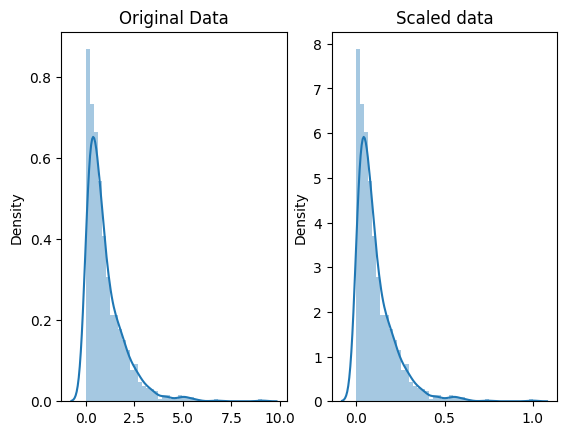

In [ ]:
# menghasilkan 1000 titik data yang diambil secara acak dari distribusi eksponensial
# masih pake library python
data = np.random.exponential(size=1000)

# mix-max skala data antara 0 dan 1
scaled_data = minmax_scaling(data, columns=[0])

# membandingkan data eksponensial dan scaled data
fig, ax = plt.subplots(1,2)
sns.distplot(data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

<ipython-input-14-1477dc138d59>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, ax=ax[0])
<ipython-input-14-1477dc138d59>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalisasi_data[0], ax=ax[1])


Text(0.5, 1.0, 'Normalisasi Data')

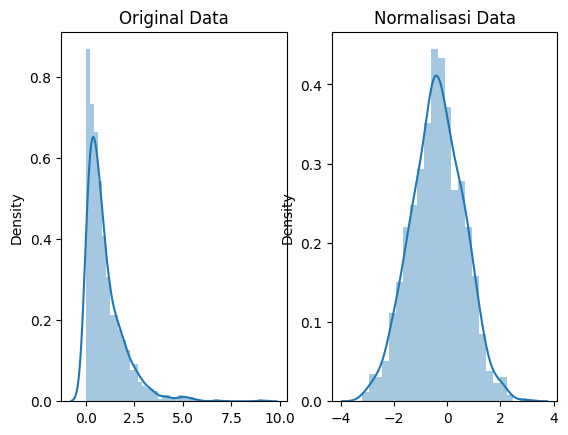

In [ ]:
# menormalisasi data pake min max atau z score

# menormalisasi data eksponensial dengan boxcox
normalisasi_data = stats.boxcox(data)

# membandingkan original data dan normalisasi data
fig, ax=plt.subplots(1,2)
sns.distplot(data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalisasi_data[0], ax=ax[1])
ax[1].set_title("Normalisasi Data")

# Data yg dipake untuk model

In [ ]:
# Hanya untuk case di Indonesia mengambil variabel utama nya
new_columns = ['Date','Province','Population','New Cases','New Deaths','New Recovered',
               'New Active Cases','Total Cases','Total Deaths','Total Recovered','Total Active Cases']
covid_data = data[new_columns]

#grouping total kematian, recovered, active , total cases dari covid sampe sept 2022
total_covid= covid_data.groupby('Date')[['Total Cases','Total Deaths','Total Recovered','Total Active Cases']].sum().
              reset_index().sort_values('Date', ascending=True).reset_index(drop=True)
total_covid.head(10)

# Visualisasi Parameter untuk Permodelan menggunakan subplot




In [ ]:
# grouping total kematian, recovered, active , total cases dari covid sampe sept 2022 (IN CASE INGIN MENGGUNAKAN TOTAL DARI MASING2 PARAMEETER NYA)
total_covid= covid_data.groupby('Date')[['Total Cases','Total Deaths','Total Recovered','Total Active Cases']].sum().reset_index().sort_values('Date', ascending=True).reset_index(drop=True)
total_covid.head(100)

,Date,Total Cases,Total Deaths,Total Recovered,Total Active Cases
0,2020-03-01,39,20,75,-56
1,2020-03-02,44,20,76,-52
2,2020-03-03,47,21,136,-110
3,2020-03-04,50,21,136,-107
4,2020-03-05,51,22,136,-107
...,...,...,...,...,...
95,2020-06-04,58175,3692,20658,33825
96,2020-06-05,59603,3803,21798,34002
97,2020-06-06,61433,3861,22665,34907
98,2020-06-07,62972,3964,23852,35156


In [ ]:
# Perbandingan Kasus Covid di Indonesia dengan melakukan grouping (atau di totalkan untuk setiap variabel)
fig = go.Figure()
fig.add_trace(go.Scatter(x=total_covid['Date'],
                         y=total_covid['Total Cases'],
                         mode='lines',
                         name= 'Total Cases'
                        ))

fig.add_trace(go.Scatter(x=total_covid['Date'],
                         y=total_covid['Total Active Cases'],
                         mode='lines',
                         name= 'Active Cases',
                         marker_color= 'red'
                         ))

fig.add_trace(go.Scatter(x=total_covid['Date'],
                         y=total_covid['Total Deaths'],
                         mode='lines',
                         name='Death Cases',
                         marker_color='black',
                         line=dict(dash='dot')
                        ))

fig.add_trace(go.Scatter(x=total_covid['Date'],
                         y=total_covid['Total Recovered'],
                         mode='lines',
                         name='Recovered Case',
                         marker_color='green'
                        ))

fig.update_layout(title='Perbandingan Total Kasus Covid di Indonesia dari 2020 sampai September 2022',
                 template='plotly_white',
                 xaxis_title='Date',
                 yaxis_title='Total Cases'
                 )
fig.show()

Text(0, 0.5, 'Total Active Cases')

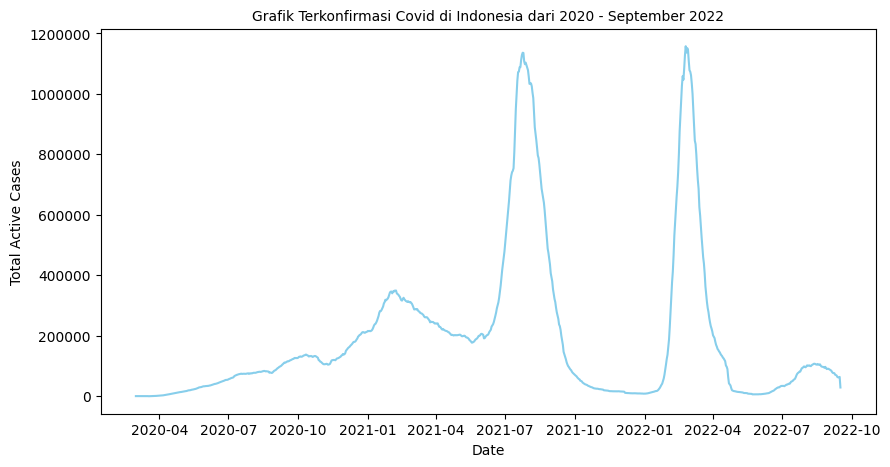

In [ ]:
# Kasus Terkonfirmasi COVID-19 di Indonesia dari 1 Maret 2020 - 16 September 2022
f, ax = plt.subplots(figsize=(10,5))
plt.ticklabel_format(style='plain')
sns.lineplot(x=total_covid["Date"], y=total_covid["Total Active Cases"].fillna(np.inf), color='skyblue')
ax.set_title('Grafik Terkonfirmasi Covid di Indonesia dari 2020 - September 2022', fontsize=10)
ax.set_ylabel(ylabel='Total Active Cases', fontsize=10)

Text(0, 0.5, 'New Active Cases')

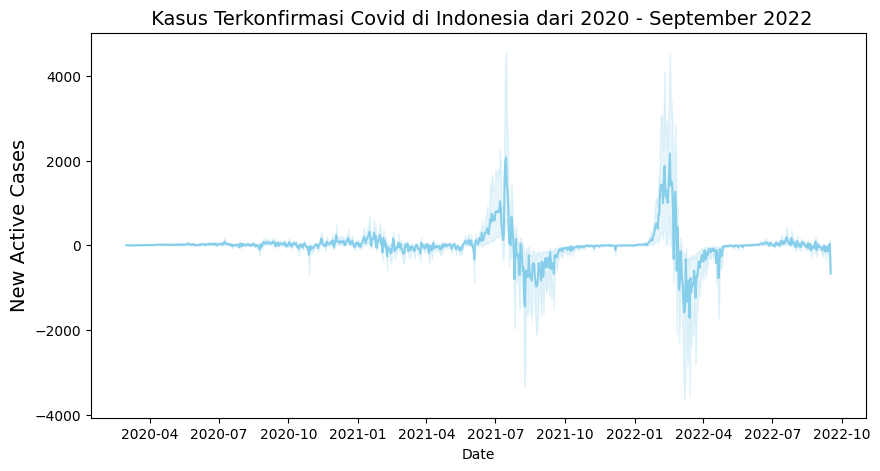

In [ ]:
# Kasus New active Cases hanya kasus covid yg baru terkonfirmasi

f, ax = plt.subplots(figsize=(10,5))
plt.ticklabel_format(style='plain')
sns.lineplot(x=covid_data["Date"], y=covid_data["New Active Cases"].fillna(np.inf), color='skyblue')
ax.set_title(' Kasus Terkonfirmasi Covid di Indonesia dari 2020 - September 2022', fontsize=14)
ax.set_ylabel(ylabel='New Active Cases', fontsize=14)

<ipython-input-304-215260ae98c2>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



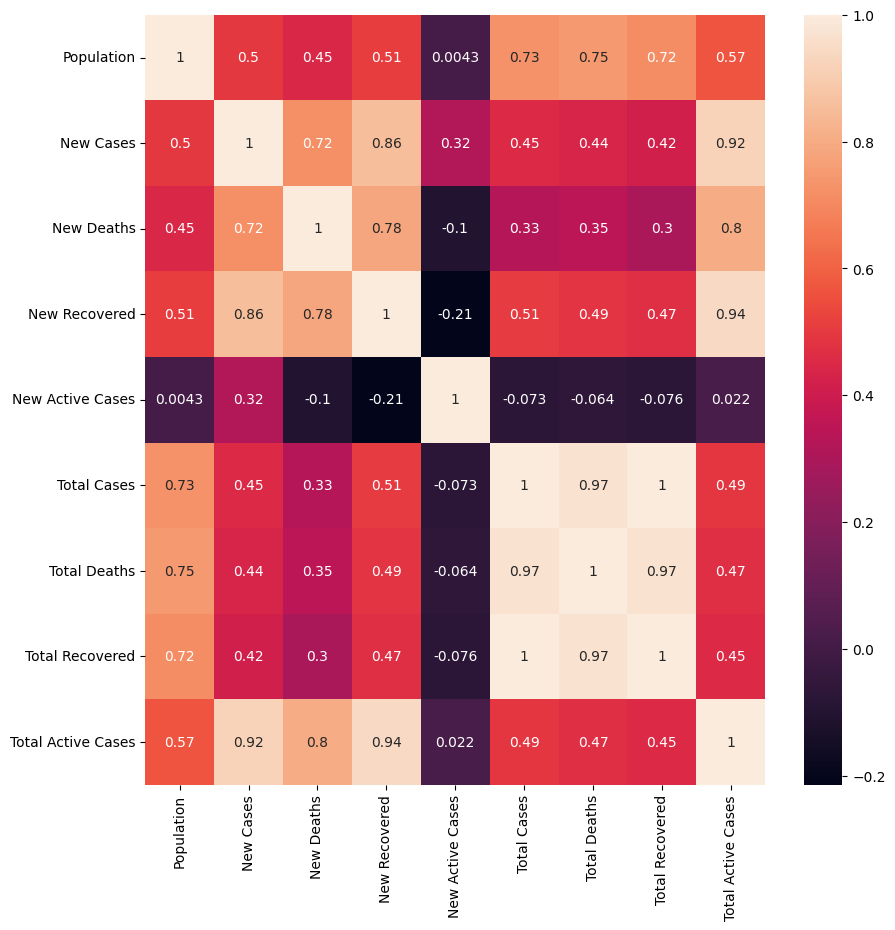

In [ ]:
#feature extraction/selection -> mencari hubungan / korelasi dari tiap2 variabel/ parameter
plt.figure(figsize=(10,10))
sns.heatmap(covid_data.corr(), annot=True)
plt.show()

# Trend

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
#total_covid.set_index('Date', inplace=True)
newactivecases = total_covid[['Total Active Cases']].copy()
#newactivecases.plot(figsize=(20,10), linewidth=3, fontsize=20)
#plt.xlabel ('Date', fontsize=20)

decompose_result_mult = seasonal_decompose(newactivecases, model="additive", period=365) #periode itu adalah cycle nya/ pattern nya mau di define bagaimana

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

#decompose_result_mult.plot()
#trend.plot()



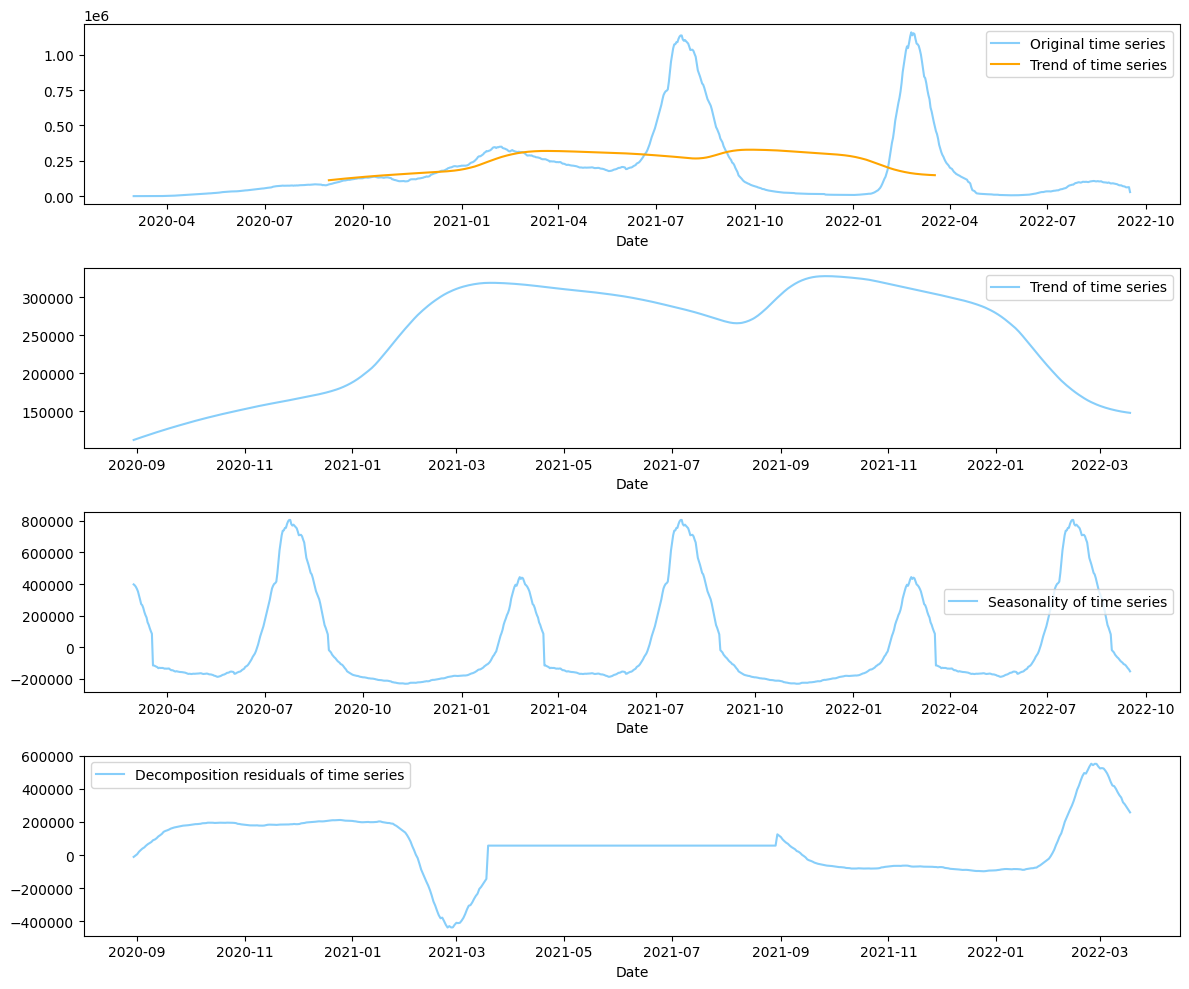

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(411)
plt.plot(newactivecases,label='Original time series', color='lightskyblue')
plt.plot(trend,label='Trend of time series',color='orange')
plt.xlabel ('Date')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend of time series',color='lightskyblue')
plt.legend(loc='best')
plt.xlabel ('Date')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality of time series',color='lightskyblue')
plt.legend(loc='best')
plt.xlabel ('Date')
plt.subplot(414)
plt.plot(residual,label='Decomposition residuals of time series',color='lightskyblue')
plt.legend(loc='best')
plt.xlabel ('Date')
plt.tight_layout()


In [ ]:
#covid_data.insert(1, 'Hari Ke', range(0,0 + len(covid_data)))
covid_data.head()

,Date,Hari Ke,Province,Population,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
0,2020-03-01,0,DKI Jakarta,10846145,2,0,0,2,39,20,75,-56
1,2020-03-02,1,DKI Jakarta,10846145,2,0,0,2,41,20,75,-54
2,2020-03-02,2,Unknown,265185520,2,0,0,2,2,0,0,2
3,2020-03-02,3,Riau,6074100,1,0,0,1,1,0,1,0
4,2020-03-03,4,DKI Jakarta,10846145,2,0,0,2,43,20,75,-52


# data tes



In [ ]:
# Set variabel untuk pemodelan
new_columns = ['Date','Total Active Cases']
data_tes = total_covid[new_columns]
data_tes.reset_index(inplace=True)

In [ ]:
new_columns = ['Date','Total Active Cases']
data_tes = total_covid[new_columns]


In [ ]:
data_tes.reset_index(inplace=True)
data_tes.tail()

,index,Date,Total Active Cases
925,925,2022-09-12,63028
926,926,2022-09-13,61882
927,927,2022-09-14,62253
928,928,2022-09-15,63328
929,929,2022-09-16,28460


In [ ]:
#data_tes= np.array(range(229))
#data_tes= data_tes.reshape(-1,1)


In [ ]:
#format date nya diganti
#covid_data['Date'] = pd.to_datetime(covid_data['Date'])
#covid_data.tail()

In [ ]:
#covid_data.set_index('Date', inplace=True)
#covid_data.tail()

# Mulai Prediksi Dan Split Data

In [ ]:
#mulai split data
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score

x = data_tes.drop(['Date','Total Active Cases'],axis = 1)
y = data_tes['Total Active Cases']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size = 0.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(697, 1)
(697,)
(233, 1)
(233,)


In [ ]:
#Scalling the Data
pipeline = Pipeline([
   ('std_scalar', StandardScaler())
])

x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test)

In [ ]:
#hanya bisa di run sekali krn ini di reshape bentuk array nya
y_train= y_train.values.reshape(-1,1)
x_train= x_train.values.reshape(-1,1)

In [ ]:
#hanya bisa di run sekali
y_test= y_test.values.reshape(-1,1)
x_test= x_test.values.reshape(-1,1)

In [ ]:
x_train.shape

(200475, 1)

In [ ]:
y_train.shape

(22275, 1)

In [ ]:
#Scalling the Data, supaya nominal angka data bisa seragam (tidak terlalu besar Range-nya)from sklearn.preprocessing import StandardScaler
# harus reset index dulu karena ketika mau di scale, data frame tidak bisa baca timestamp. jadi harus diubah jadi index
pipeline = Pipeline([
   ('std_scalar', StandardScaler())
])

x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test)

In [ ]:
from sklearn.svm import SVR

# Pilih kernel terbaik untuk data

for k in ['linear','poly','rbf']:
    kernel = SVR(kernel=k)
    kernel.fit(x_train, y_train)
    best_kernel = kernel.score(x_train, y_train)
    print(k,round((best_kernel),4))

linear -0.1142
poly -0.1147
rbf -0.1138


# Coba Kernel Linear

In [ ]:
param = [{
    'kernel' : ['linear'],
    'C' : [0.25 , 0.5, 1,2 ], #dari jurnal prahutama 2014
    'epsilon' : [0.005, 0.05, 0.01, 0.5, 0.1, 1, 2, 10]
}]

In [ ]:
#MENCOBA SEMUA PARAMETER NYA
from sklearn.model_selection import GridSearchCV
model = SVR()
svr_linear = GridSearchCV(model,param, cv= 10)
svr_linear.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid=[{'C': [0.25, 0.5, 1, 2],
                          'epsilon': [0.005, 0.05, 0.01, 0.5, 0.1, 1, 2, 10],
                          'kernel': ['linear']}])

In [ ]:
#MENCARI PARAM TERBAIK UNTUK PERMODELAN LINEAR
svr_linear.best_score_, svr_linear.best_params_

(-0.1259693717209453, {'C': 0.25, 'epsilon': 0.005, 'kernel': 'linear'})

In [ ]:
#coba ambil C nya = 0.25, eplison = 0.005  (sebelumnya ini hasil best param untuk total active cases)
svr_linear = SVR(C= 0.25, epsilon=  0.005, kernel='linear')
svr_linear.fit(x_train, y_train)

SVR(C=0.25, epsilon=0.005, kernel='linear')

In [ ]:
#The intercept (sometimes called the “constant”) in a regression model represents the mean value of the response variable
#when all of the predictor variables in the model are equal to zero.

print(svr_linear.intercept_)

[101203.56838598]


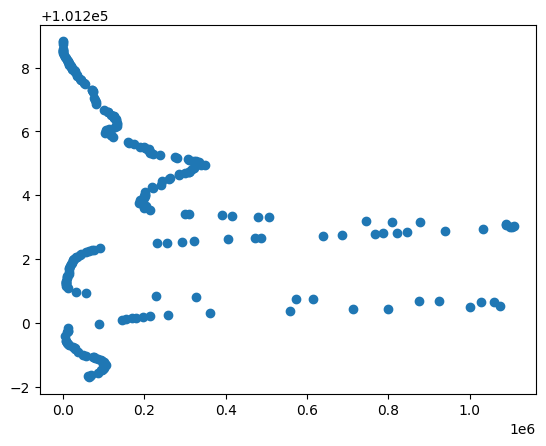

In [ ]:
svr_pred = svr_linear.predict(x_test)
plt.scatter(y_test, svr_pred)

# Model Evaluasi

In [ ]:
# EVALUASI

from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
svr_test_pred = svr_linear.predict(x_test)
svr_train_pred = svr_linear.predict(x_train)

#PRINT HASIL EVALUASI DAN PREDIKSI
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, svr_test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, svr_train_pred)

Test set evaluation:
_____________________________________
MAE: 172188.38261734496
MSE: 85896229312.73407
RMSE: 293080.58501499903
R2 Square -0.16964686178326627
__________________________________
Train set evaluation:
_____________________________________
MAE: 148408.0427445617
MSE: 69488308603.93224
RMSE: 263606.35160013166
R2 Square -0.11425560390453504
__________________________________


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#print evaluasi sama kyk yg di atas

svr_test_pred = svr_linear.predict(x_test)

print('Evaluation of train :\n_____________________________________')
print('\n R2 Square : ', round(r2_score(y_test, svr_test_pred),4))
print('\n RMSE      : ',round(np.sqrt(mean_squared_error(y_test, svr_test_pred)),4))
print('\n MAE       : ',round(mean_absolute_error(y_test, svr_test_pred),4))
print('\n MSE       : ',round(mean_squared_error(y_test, svr_test_pred),4))
#print('\n MAPE      : ',mean_squared_error(y_test, svr_test_pred))



Evaluation of train :
_____________________________________

 R2 Square :  -0.1696

 RMSE      :  293080.585

 MAE       :  172188.3826

 MSE       :  85896229312.7341


In [ ]:
#df_svr = pd.DataFrame({'Real Values':y_test, 'Predicted Values':svr_test_pred})
df = pd.DataFrame({'Actual': y_test, 'Predicted': svr_test_pred})
df.tail(10)


,Actual,Predicted
892,103871,101198.704063
665,8783,101201.284569
525,939620,101202.876071
280,159587,101205.661200
765,169891,101200.147782
380,263695,101204.524412
227,133899,101206.263697
793,14084,101199.829482
799,12330,101199.761275
286,175803,101205.592992


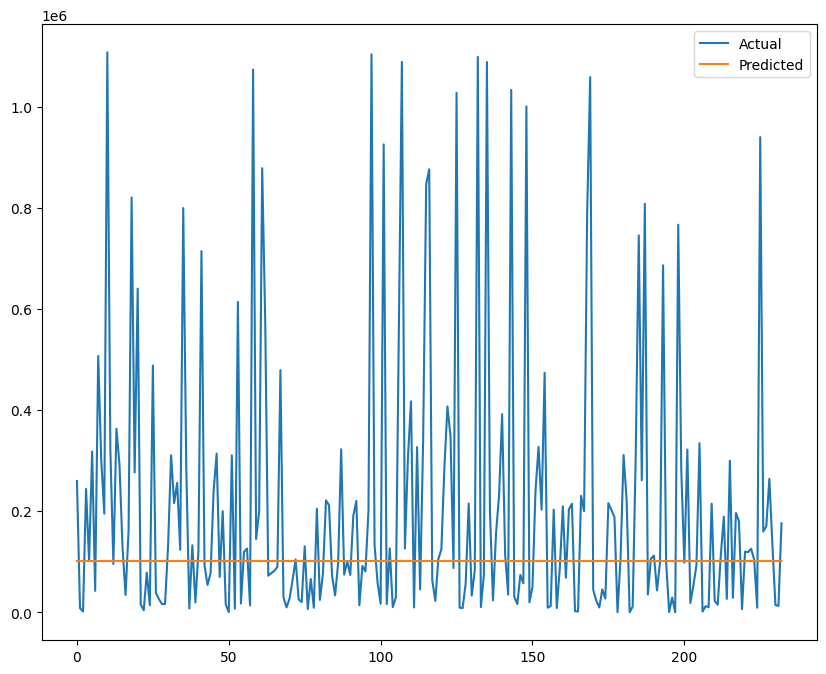

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(df['Actual'].values, label = 'Actual')
plt.plot(df['Predicted'].values, label = 'Predicted')
plt.legend()
plt.show()

# Coba kernel RBF

In [ ]:
# Define grid of parameter values for Gamma and C Parameters
param_grid = {'gamma': [0.1, 0.5, 1.0],'epsilon' : [0.002, 0.0001, 0.01, 1], 'C': [1, 5, 10]}

# Define SVM model with RBF kernel
SVR_RBF = SVR(kernel='rbf')

# Perform grid search with cross-validation
SVR_RBF = GridSearchCV(SVR_RBF, param_grid, cv=5)
SVR_RBF.fit(x_train, y_train)

# accuracy score from gridsearchCV by using best_score
print(SVR_RBF.best_params_,SVR_RBF.best_score_ )

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 5, 10], 'epsilon': [0.002, 0.0001, 0.01, 1],
                         'gamma': [0.1, 0.5, 1.0]})

In [ ]:
#SVR_RBF.best_score_, svr.best_param_grid
print(SVR_RBF.best_params_,SVR_RBF.best_score_ )

{'C': 10, 'epsilon': 0.002, 'gamma': 1.0} -0.11354069766588445


In [ ]:
#  C  = 10, eplison = 0.002 , gamma': 1.0 ( best param for total active cases)
svr_rbf = SVR(C= 10, epsilon=  0.002, gamma = 1.0, kernel='rbf')
svr_rbf.fit(x_train, y_train)


SVR(C=10, epsilon=0.002, gamma=1.0)

In [ ]:
svr_rbf = SVR(kernel='rbf', C=1, gamma= 0.5)
svr_rbf.fit(x_train, y_train)

SVR(C=1, gamma=0.5)

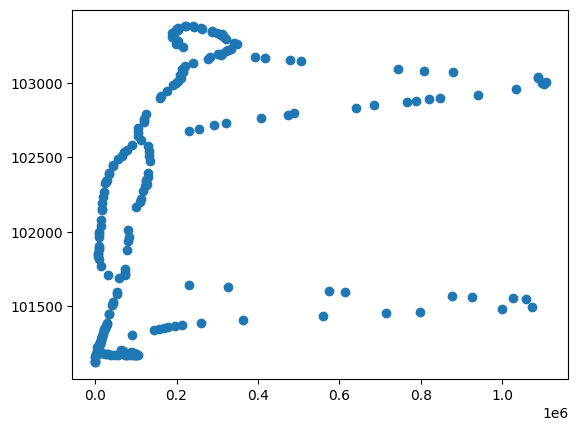

In [ ]:
svr_pred = svr_rbf.predict(x_test)
plt.scatter(y_test, svr_pred)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#print evaluasi sama kyk yg di atas

svr_test_pred = svr_rbf.predict(x_test)

print('Evaluation of train :\n_____________________________________')
print('\n R2 Square : ', round(r2_score(y_test, svr_test_pred),4))
print('\n RMSE      : ',round(np.sqrt(mean_squared_error(y_test, svr_test_pred)),4))
print('\n MAE       : ',round(mean_absolute_error(y_test, svr_test_pred),4))
print('\n MSE       : ',round(mean_squared_error(y_test, svr_test_pred),4))



Evaluation of train :
_____________________________________

 R2 Square :  -0.1645

 RMSE      :  292438.5496

 MAE       :  171583.0855

 MSE       :  85520305287.9014


In [ ]:
#df_svr = pd.DataFrame({'Real Values':y_test, 'Predicted Values':svr_test_pred})
df = pd.DataFrame({'Actual': y_test, 'Predicted': svr_test_pred})
df.tail(10)

,Actual,Predicted
892,103871,101173.312299
665,8783,101883.812150
525,939620,102917.472336
280,159587,102899.607971
765,169891,101354.884862
380,263695,103362.212338
227,133899,102470.799216
793,14084,101268.717055
799,12330,101253.894101
286,175803,102942.573367


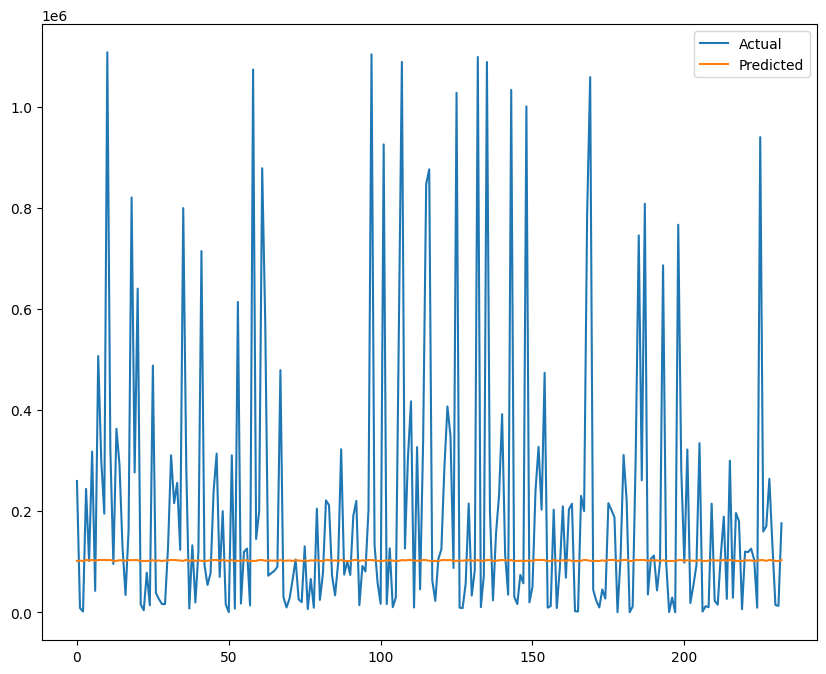

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(df['Actual'].values, label = 'Actual')
plt.plot(df['Predicted'].values, label = 'Predicted')
plt.legend()
plt.show()

# Coba kernel Poli

In [ ]:
param = [{
    'kernel' : ['poly'],
    'degree' : [1,2,3], #Adiningtyas et al., 2015
    'C' : [0.25,0.5,1],
    'coef0': [0.001, 0.010,  0.100 ],
    'epsilon': [0.01, 0.1 , 0.2, 1 ,],
    'gamma': [1,2,'scale']
}]

In [ ]:
#MENCOBA SEMUA PARAMETER NYA
from sklearn.model_selection import GridSearchCV
model = SVR()
svr = GridSearchCV(model,param, cv= 5, verbose = 3,n_jobs=-1)

#fitting the model untuk grid search
svr.fit(x_train, y_train)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [0.25, 0.5, 1], 'coef0': [0.001, 0.01, 0.1],
                          'degree': [1, 2, 3], 'epsilon': [0.01, 0.1, 0.2, 1],
                          'gamma': [1, 2, 'scale'], 'kernel': ['poly']}],
             verbose=3)

In [ ]:
svr.best_score_, svr.best_params_

(-0.11097514998226007,
 {'C': 1,
  'coef0': 0.1,
  'degree': 2,
  'epsilon': 0.01,
  'gamma': 2,
  'kernel': 'poly'})

In [ ]:
##coba ambil C nya = 10, eplison = 0.002 , gamma': 1.0 (sebelumnya ini hasil best param untuk total active cases)
svr_poly = SVR(C= 1, coef0=  0.01, degree = 2, epsilon = 0.01, gamma = 2,  kernel='poly')
svr_poly.fit(x_train, y_train)

SVR(C=1, coef0=0.01, degree=2, epsilon=0.01, gamma=2, kernel='poly')

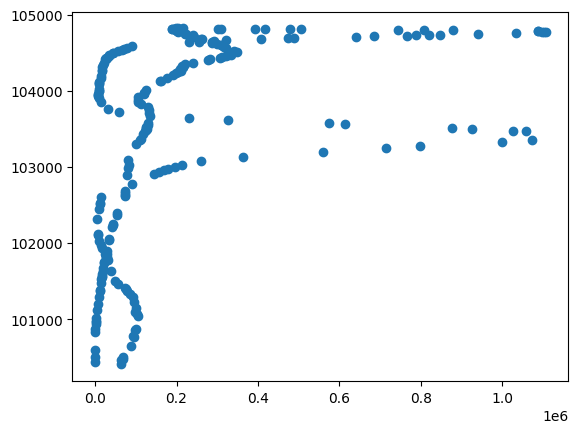

In [ ]:
svr_pred = svr_poly.predict(x_test)
plt.scatter(y_test, svr_pred)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#print evaluasi sama kyk yg di atas

svr_test_pred = svr_linear.predict(x_test)

print('Evaluation of train :\n_____________________________________')
print('\n R2 Square : ', round(r2_score(y_test, svr_test_pred),4))
print('\n RMSE      : ',round(np.sqrt(mean_squared_error(y_test, svr_test_pred)),4))
print('\n MAE       : ',round(mean_absolute_error(y_test, svr_test_pred),4))
print('\n MSE       : ',round(mean_squared_error(y_test, svr_test_pred),4))
#print('\n MAPE      : ',mean_squared_error(y_test, svr_test_pred))


r-squared is  -0.15878900736872215  and root_mean_squared_error is  291717.0769025698


In [ ]:
#df_svr = pd.DataFrame({'Real Values':y_test, 'Predicted Values':svr_test_pred})
df = pd.DataFrame({'Actual': y_test, 'Predicted': svr_test_pred})
df.head()

,Actual,Predicted
756,259484,101388.581340
669,8053,101856.819366
30,1256,101172.854549
388,243948,103371.835792
192,101156,102165.775197


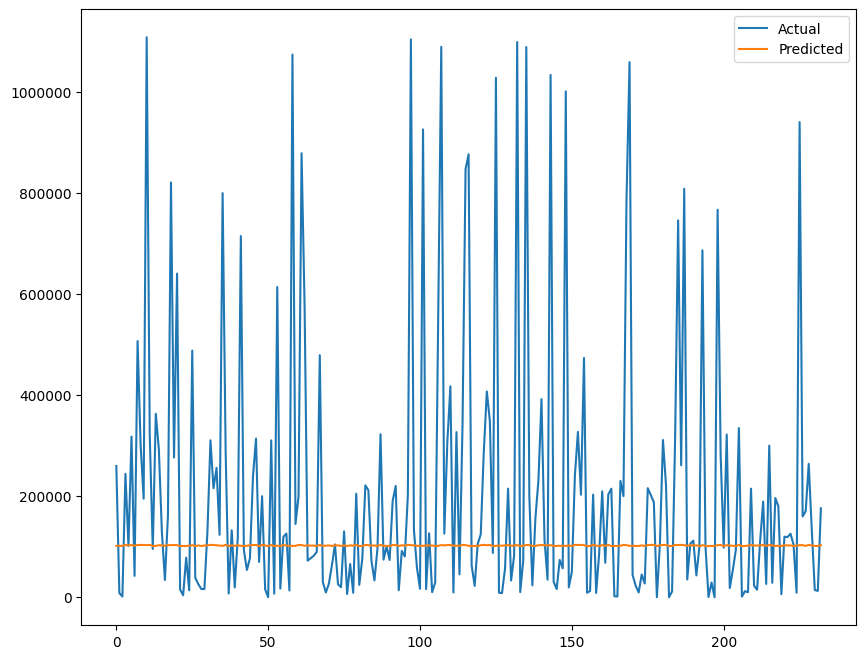

In [ ]:
plt.figure(figsize=(10,8))
plt.ticklabel_format(style='plain')
plt.plot(df['Actual'].values, label = 'Actual')
plt.plot(df['Predicted'].values, label = 'Predicted')
plt.legend()
plt.show()